In [19]:
from astropy.time import Time
#Bokeh plotting
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import Span, Label, Arrow, NormalHead
from bokeh.models import HoverTool, tools, ColumnDataSource, CustomJS, Slider, BoxAnnotation
output_notebook()
from bokeh.models import HoverTool, tools, ColumnDataSource, CustomJS, Slider, BoxAnnotation
from bokeh.layouts import  column, row
from astropy.timeseries import LombScargle
import numpy as np
from bokeh.palettes import viridis, inferno
import matplotlib.pyplot as plt
from bokeh.models import Title
from bokeh.models import HoverTool, tools,ColumnDataSource, Whisker, ColorBar, LinearColorMapper

Loading BokehJS ...

In [20]:
t = ['2015-08-11T07:49:39.006',
     '2015-08-11T07:54:43.020',
     '2015-08-11T07:59:47.003',
     '2015-08-11T08:04:51.007',
     '2015-08-11T08:09:55.001',
     '2015-08-11T08:14:59.005',
     '2015-08-11T08:20:03.020',
     '2015-08-11T08:25:07.003',
     '2015-08-11T08:30:11.007',
     '2015-08-11T08:35:15.001',
     '2015-08-11T08:40:19.005',
     '2015-08-11T09:02:50.002',
     '2015-08-11T09:07:54.006',
     '2015-08-11T09:12:58.011',
     '2015-08-11T09:18:02.004',
     '2015-08-11T09:23:06.008',
     '2015-08-11T09:28:10.002',
     '2015-08-11T09:33:14.006',
     '2015-08-11T09:38:18.027',
     '2015-08-11T09:43:22.004',
     '2015-08-11T09:48:26.008',
     '2015-08-11T09:53:30.002']

In [21]:
t2 = Time(t,format='isot', scale='utc')

In [22]:
vrad = [0,
        22.210,
        6.017,
        -0.124,
        -57.184,
        -23.137,
        -38.294,
        -71.568,
        -37.782,
        -1.375,
        53.624,
        -76.426,
        -101.977,
        -35.461,
        48.489,
        8.196,
        -19.974,
        -13.414,
        -23.377,
        7.019,
        -42.796,
        -42.279]
        
    


In [23]:

source = ColumnDataSource(data=dict(x=t2.mjd,y=vrad))
hover = HoverTool(
        tooltips=[
            #("index", "$index"),
            ("(x,y)", "($x{1.11}, $y)"),
        ]
    )

plot = figure(x_axis_label='MJD', y_axis_label='vrad(km/s)',title="Spectra",
              active_scroll='wheel_zoom',plot_width=900, plot_height=700)
plot.add_tools(hover)
plot.line('x','y',source=source)
show(plot)

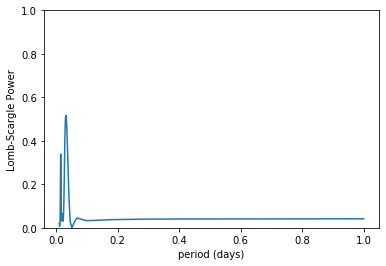

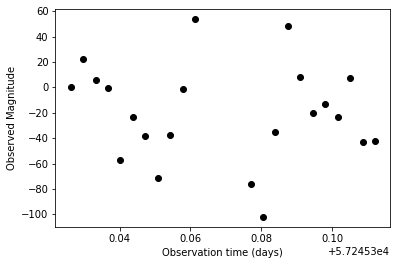

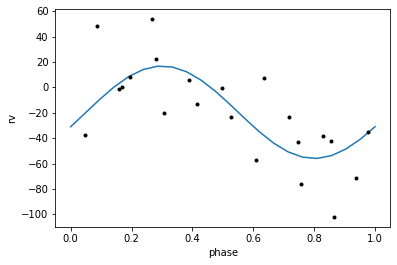

Best_frequency: 31.230133349181266, Period: 0.03202035639166479 days, 46.1093132039973 Minutes


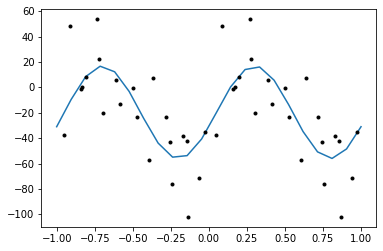

In [24]:
mjd = t2.mjd

mag = vrad



freq, PLS = LombScargle(mjd, mag).autopower(minimum_frequency=1 / 1.,
                                                maximum_frequency=1 / 0.01)


best_freq = freq[np.argmax(PLS)]
phase = (mjd * best_freq) % 1

# compute the best-fit model
phase_fit = np.linspace(0, 1,len(mjd))
mag_fit = LombScargle(mjd, mag).model(t=phase_fit / best_freq,
                                          frequency=best_freq)
# plot the periodogram

fig, ax = plt.subplots()

plt.plot(1. / freq, PLS)
ax.set(xlabel='period (days)',
          ylabel='Lomb-Scargle Power',
          ylim=(0, 1));
plt.show()


fig, ax = plt.subplots()

# plot the raw data
ax.errorbar(mjd, mag, fmt='ok', elinewidth=1.5, capsize=0)
#ax.invert_yaxis()
ax.set(   xlabel='Observation time (days)',
          ylabel='Observed Magnitude')

#plt.plot(t,mag_fit)



fig, ax = plt.subplots()
# plot the phased data & model in the inset
plt.errorbar(phase, mag, fmt='.k', capsize=0)
plt.plot(phase_fit, mag_fit)


#ax.invert_yaxis()
ax.set_xlabel('phase')
ax.set_ylabel('rv')
plt.show()


#Two phases

phase2 = phase-1
phasesall= np.concatenate((phase2, phase), axis=None)
magall = np.concatenate((mag,mag),axis=None)

# compute the best-fit model
phase_fit2 = np.linspace(-1, 1,len(mjd))
mag_fit2 = LombScargle(mjd, mag).model(t=phase_fit2 / best_freq,
                                          frequency=best_freq)


fig, ax = plt.subplots()
# plot the phased data & model in the inset
plt.errorbar(phasesall, magall, fmt='.k', capsize=0);
plt.plot(phase_fit2, mag_fit2);
summary = 'Best_frequency: {}, Period: {} days, {} Minutes'.format(best_freq,1/best_freq,
                                                                               1/best_freq*24*60.)
print(summary)

In [16]:


freq, PLS = LombScargle(mjd, mag).autopower(minimum_frequency=1 / 1.,
                                                maximum_frequency=1 / 0.01)

best_freq = freq[np.argmax(PLS)]

summary = 'Best_frequency: {}, Period: {} days'.format(best_freq,1/best_freq)


summary = 'Best_frequency: {}, Period: {} days, {} Minutes'.format(best_freq,1/best_freq,
                                                                               1/best_freq*24*60.)
sumseconds = '{} Seconds'.format( 1/best_freq*24*60.*60.)
#p.add_layout(Title(text=sumseconds, text_font_size="10pt"), 'above')


print(summary)
p1 = figure(plot_width=900, plot_height=500, title=summary,active_drag='pan', active_scroll='wheel_zoom',y_axis_label='Power',x_axis_label='Period (days)')
p2 = figure(plot_width=900, plot_height=500, title='',active_drag='pan', active_scroll='wheel_zoom',y_axis_label='Power',x_axis_label='Freq (1/days)')


#source1 = ColumnDataSource(data={'power':PLS,
#                              'period': 1./freq})

period = 1./freq
periodsec =period*24.*60.*60.
source1 = ColumnDataSource(data={'power':PLS,
                              'period':1./freq,
                                 'periodsec':periodsec,
                                'freq':freq})

#Tool to get wavelength
hover1 = HoverTool(
        tooltips=[
            ('Period', '(@period{0.0000000}'),
            ('Frequency', '(@freq{0.00000})'),
             ('PeriodSec', '(@periodsec{0.0000000}'),
        ]
    )


p1.add_tools(hover1)
p2.add_tools(hover1)



# add a circle renderer with a size, color, and alpha

p1.line('period','power',source=source1)
p2.line('freq','power',source=source1)

show(p1)
show(p2)

Best_frequency: 31.230133349181266, Period: 0.03202035639166479 days, 46.1093132039973 Minutes


In [17]:
best_freq = freq[np.argmax(PLS)]
#best_freq = 819.47442


summary = 'Best_frequency: {}, Period: {} days, {} Minutes'.format(best_freq,1/best_freq,
                                                                               1/best_freq*24*60.)
sumseconds = '{} Seconds'.format( 1/best_freq*24*60.*60.)


phase = (mjd * best_freq) % 1

# compute the best-fit model
phase_fit = np.linspace(0, 1,len(mjd))
mag_fit = LombScargle(mjd, mag).model(t=phase_fit / best_freq,
                                          frequency=best_freq)
#Two phases

phase2 = phase-1
phasesall= np.concatenate((phase2, phase), axis=None)
magall = np.concatenate((mag,mag),axis=None)
mjdall =  np.concatenate((mjd,mjd),axis=None)


# compute the best-fit model
phase_fit2 = np.linspace(-1, 1,len(mjd))
mag_fit2 = LombScargle(mjd, mag).model(t=phase_fit2 / best_freq,
                                          frequency=best_freq)



#my_palette = big_palette(len(mag),viridis)
my_palette = viridis(len(mag))
colorlist = my_palette


p = figure(plot_width=900, plot_height=500, title=summary,active_drag='pan'
           , active_scroll='wheel_zoom',y_axis_label='flux',x_axis_label='Phase')

p.add_layout(Title(text=sumseconds, text_font_size="10pt"), 'above')


source = ColumnDataSource(data={'phase':phasesall,
                                'flux':magall,
                                'mjd':mjdall })
  


#Tool to get wavelength
hover2 = HoverTool(
        tooltips=[
            ('Date', '(@mjd{0.0000})')
        ]
    )


p.add_tools(hover2)


# add a circle renderer with a size, color, and alpha
#p.add_layout(
#    Whisker(source=source, base="phase", upper="upper", lower="lower")
#)

p.line(phase_fit2, mag_fit2,color='red')
#p.y_range.flipped = True

mapper = LinearColorMapper(palette=colorlist, low=mjdall.min(), high=mjdall.max())

#mapper.low_color = 'blue'
#mapper.high_color = 'red'

color_bar = ColorBar(color_mapper=mapper, location=(0, 0.5),title='MJD')

p.circle('phase','RV',source=source,color={'field': 'mjd', 'transform': mapper})


p.add_layout(color_bar, 'right')
#@date{%F}'

show(p)